

*   Nama : Mutiara Ainun Shafa
*   Username : tiarashafa
*   Bergabung : 6 May 2020
*   Institusi : Universitas Pamulang 

referensi
* medium.com/@hafizhan.aliady/
* faroit.com/keras-doc/




In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-10 13:29:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.67MB/s    in 3m 9s   

2021-04-10 13:32:12 (1.63 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile
import os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images',
                    output = "/tmp/rockpaperscissors/",
                    ratio = (.6,.4))
 
train_dir = os.path.join("/tmp/rockpaperscissors","train")
val_dir = os.path.join("/tmp/rockpaperscissors","val")

Copying files: 2188 files [00:00, 3459.24 files/s]


In [ ]:
os.listdir("/tmp/rockpaperscissors/train")

['scissors', 'rock', 'paper']

In [ ]:
os.listdir("/tmp/rockpaperscissors/val")

['scissors', 'rock', 'paper']

In [ ]:
train_rock = os.path.join(train_dir,'rock')
train_paper = os.path.join(train_dir,'paper')
train_sci = os.path.join(train_dir,'sci')
val_rock = os.path.join(val_dir,'rock')
val_paper = os.path.join(val_dir,'paper')
val_sci = os.path.join(val_dir,'sci')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        val_dir, # direktori data validasi
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=15,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  
      verbose=2)

Epoch 1/15
25/25 - 6s - loss: 0.3052 - accuracy: 0.9300 - val_loss: 0.1365 - val_accuracy: 0.9500
Epoch 2/15
25/25 - 6s - loss: 0.2460 - accuracy: 0.9300 - val_loss: 0.3938 - val_accuracy: 0.9000
Epoch 3/15
25/25 - 6s - loss: 0.1698 - accuracy: 0.9400 - val_loss: 0.0728 - val_accuracy: 1.0000
Epoch 4/15
25/25 - 6s - loss: 0.0995 - accuracy: 0.9600 - val_loss: 0.3098 - val_accuracy: 0.9500
Epoch 5/15
25/25 - 6s - loss: 0.2027 - accuracy: 0.9300 - val_loss: 0.1134 - val_accuracy: 0.9000
Epoch 6/15
25/25 - 6s - loss: 0.1861 - accuracy: 0.9300 - val_loss: 0.4600 - val_accuracy: 0.9000
Epoch 7/15
25/25 - 6s - loss: 0.1338 - accuracy: 0.9400 - val_loss: 0.3956 - val_accuracy: 0.9500
Epoch 8/15
25/25 - 6s - loss: 0.1194 - accuracy: 0.9500 - val_loss: 0.2929 - val_accuracy: 0.9000
Epoch 9/15
25/25 - 6s - loss: 0.2430 - accuracy: 0.9100 - val_loss: 0.1201 - val_accuracy: 1.0000
Epoch 10/15
25/25 - 6s - loss: 0.1509 - accuracy: 0.9300 - val_loss: 0.0444 - val_accuracy: 1.0000
Epoch 11/15
25/25 -

In [ ]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "rps"
SAVE_MODEL_NAME = "modeladamax.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
 
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False :
     os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
 
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model/rps/modeladamax.h5...


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('PAPER')
  elif classes[0][1]==1:
    print('ROCK')
  elif classes[0][2]==1:
    print('SCISSORS')

In [ ]:
import requests
from io import BytesIO
from PIL import Image
from keras.preprocessing import image
import numpy as np
 
# Parameters
input_size = (150,150)
#define input shape
channel = (3,)
input_shape = input_size + channel
#define labels
labels = ['paper', 'rock', 'scissors']
 
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr
            
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)
 
from tensorflow.keras.models import load_model
MODEL_PATH = 'model/rps/modeladamax.h5'
model = load_model(MODEL_PATH,compile=False)

Saving 6ZAZiGMRp4VD1hDD.png to 6ZAZiGMRp4VD1hDD.png
scissors 0.99994874


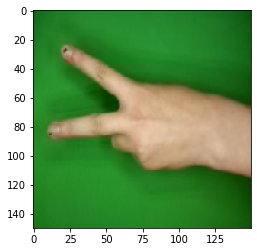

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
# read image
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = Image.open(fn)
  path1 = fn
  
  img = image.load_img(path1, target_size=(150,150))
  imgplot = plt.imshow(img)
 
  X = preprocess(path,input_size)
  X = reshape([X])
  y = model.predict(X)
  
  print(labels[np.argmax(y)], np.max(y))